# Stock Price Prediction and Model Comparison

### Required packages for pre-processing

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [59]:
csv_path = r'main.csv'
using_stock = "NABIL"

In [60]:
df = pd.read_csv(csv_path)
df = df[df['SYMBOL'] == using_stock]
df.reset_index(inplace=True, drop=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2754 entries, 0 to 2753
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BUSINESS_DATE          2754 non-null   object 
 1   SYMBOL                 2754 non-null   object 
 2   OPEN_PRICE             2754 non-null   float64
 3   HIGH_PRICE             2754 non-null   float64
 4   LOW_PRICE              2754 non-null   float64
 5   CLOSE_PRICE            2754 non-null   float64
 6   TOTAL_TRADED_QUANTITY  2754 non-null   float64
 7   TOTAL_TRADED_VALUE     2754 non-null   float64
dtypes: float64(6), object(2)
memory usage: 172.3+ KB


In [62]:
float_columns = ['open_price', 'high_price', 'low_price', 'close_price', 'total_traded_quantity', 'total_traded_value']

## Data cleaning and Pre-processing

In [63]:

def convert_to_float(row: float):
    return float(row)


def _parser(df):
    df.columns = [x.lower() for x in df.columns.to_list()]

    for f_col in float_columns:
        df[f_col] = df[f_col].apply(convert_to_float)

    df['business_date'] = pd.to_datetime(df['business_date'])

    return df


In [64]:
df = _parser(df)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2754 entries, 0 to 2753
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   business_date          2754 non-null   datetime64[ns]
 1   symbol                 2754 non-null   object        
 2   open_price             2754 non-null   float64       
 3   high_price             2754 non-null   float64       
 4   low_price              2754 non-null   float64       
 5   close_price            2754 non-null   float64       
 6   total_traded_quantity  2754 non-null   float64       
 7   total_traded_value     2754 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 172.3+ KB


In [66]:
df.fillna(0, inplace=True)

### Line plot for stock price over time (Closing price)

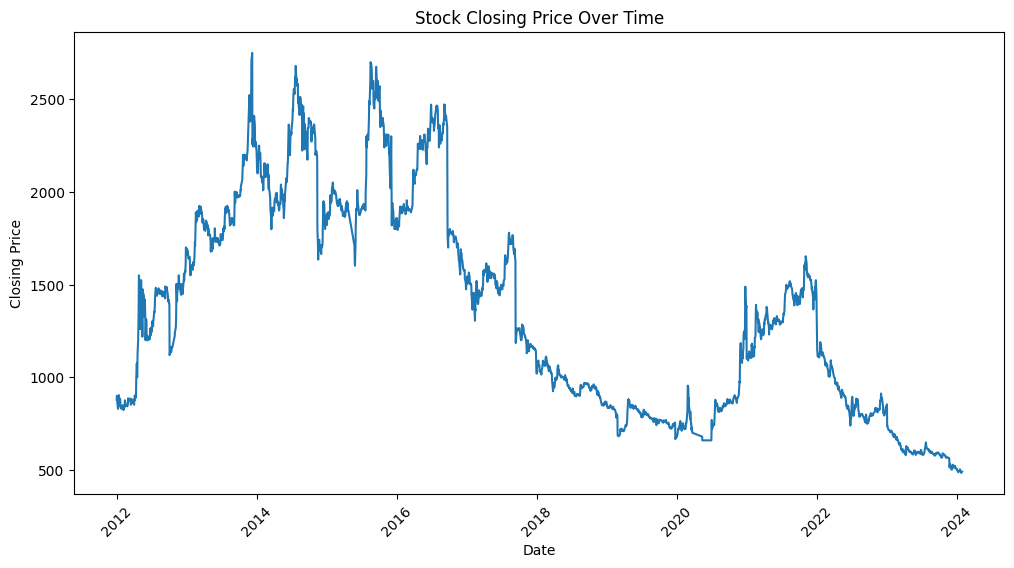

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(df['business_date'], df['close_price'])
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.show()

### Histogram of stock returns


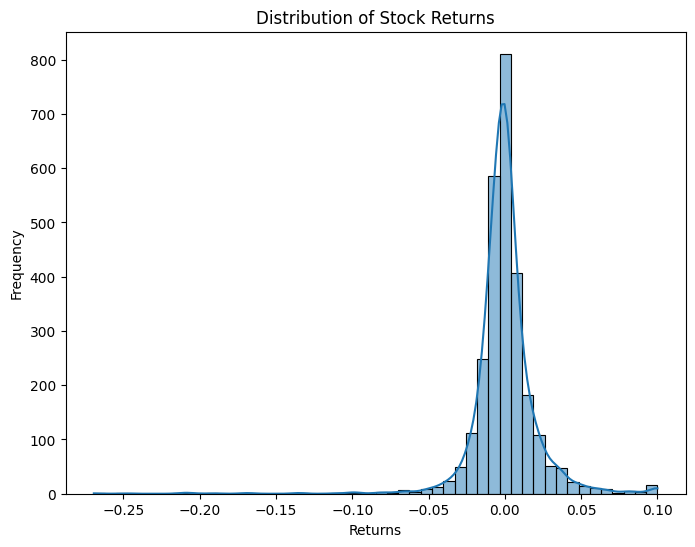

In [68]:
df['Returns'] = df['close_price'].pct_change()  # Calculate daily returns
plt.figure(figsize=(8, 6))
sns.histplot(df['Returns'].dropna(), bins=50, kde=True)
plt.title('Distribution of Stock Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

### Boxplot of stock prices


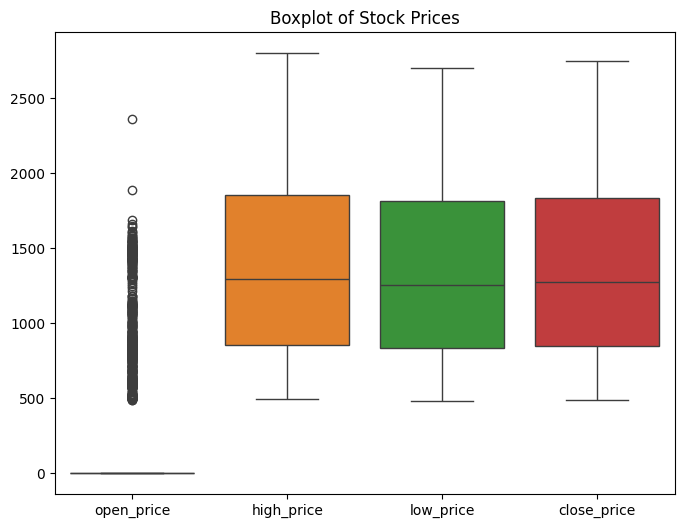

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['open_price', 'high_price', 'low_price', 'close_price']])
plt.title('Boxplot of Stock Prices')
plt.show()

### Correlation Calculation

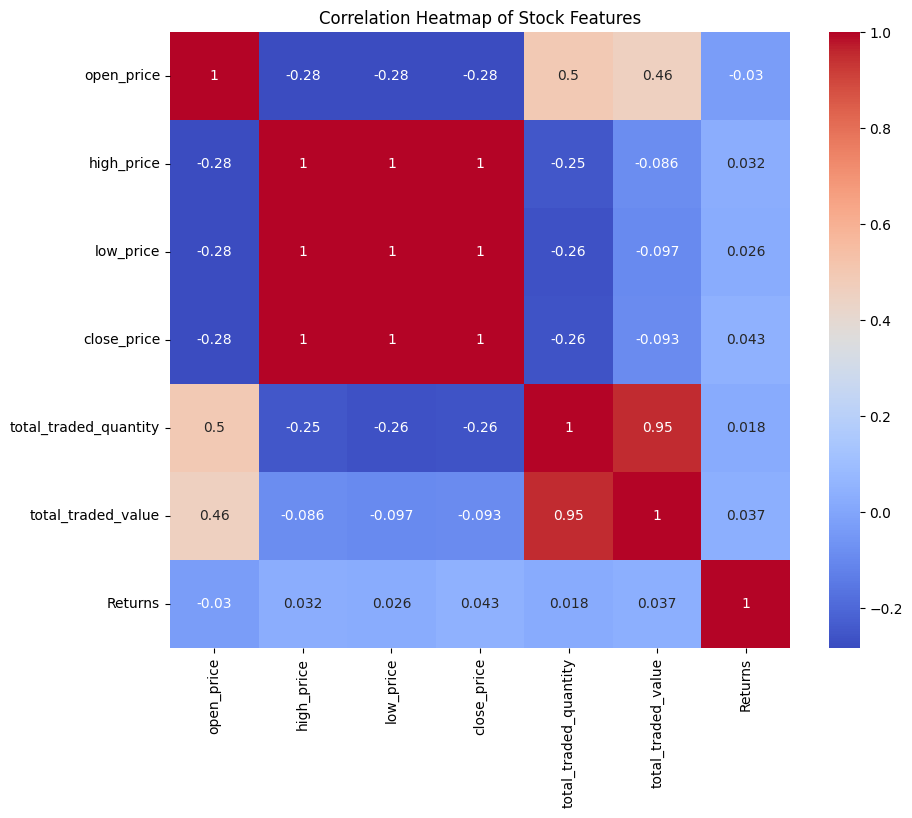

In [70]:
# Exclude non-numeric columns (like 'symbol') from the correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for the numeric columns only
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Stock Features')
plt.show()

In [71]:
# Calculate daily returns based on closing price
df['Returns'] = df['close_price'].pct_change()

# Calculate moving averages (e.g., 50-day and 200-day)
df['50_MA'] = df['close_price'].rolling(window=50).mean()
df['200_MA'] = df['close_price'].rolling(window=200).mean()

# Calculate volatility as the rolling standard deviation of returns
df['Volatility'] = df['Returns'].rolling(window=50).std()

# Display summary statistics for the new features
print(df[['Returns', '50_MA', '200_MA', 'Volatility']].describe())


           Returns        50_MA       200_MA   Volatility
count  2753.000000  2705.000000  2555.000000  2704.000000
mean      0.000046  1365.299451  1394.590998     0.019768
std       0.022256   555.761139   528.414333     0.010379
min      -0.269325   514.206000   575.093000     0.005922
25%      -0.007726   838.780000   877.931500     0.012536
50%      -0.000406  1299.100000  1324.420000     0.016818
75%       0.006726  1877.080000  2003.412500     0.024367
max       0.100000  2509.880000  2209.065000     0.057314


### Machine learning algorithms for price prediction

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

### Features to use for prediction


In [73]:
features = ['open_price', 'high_price', 'low_price', 'total_traded_quantity', 'total_traded_value']
X = df[features].dropna()
y = df['close_price'].loc[X.index]

### Train-test split

In [74]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Linear Regression


In [76]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

### 2. Random Forest Regressor


In [77]:

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


### 3. Support Vector Regressor (SVR)


In [78]:

svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)


### Compare results using metrics


In [79]:

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("SVR MSE:", mean_squared_error(y_test, y_pred_svr))

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("SVR R2:", r2_score(y_test, y_pred_svr))

Linear Regression MSE: 224.43522478083509
Random Forest MSE: 293.3197971595643
SVR MSE: 315809.1562072055
Linear Regression R2: 0.9992882434617476
Random Forest R2: 0.9990697882490102
SVR R2: -0.0015327673717211443


In [80]:
results = {
    "Model": ["Linear Regression", "Random Forest", "SVR"],
    "MSE": [mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_svr)],
    "R2 Score": [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_svr)]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model            MSE  R2 Score
0  Linear Regression     224.435225  0.999288
1      Random Forest     293.319797  0.999070
2                SVR  315809.156207 -0.001533


# Conclusion:
After implementing and evaluating three machine learning models (Linear Regression, Random Forest, and Support Vector Regressor) for predicting the stock prices in your dataset, here is a detailed analysis based on the results:

## 1. Model Performance:
Linear Regression:
MSE: 224.44
R² Score: 0.9993
Linear Regression performed exceptionally well in terms of both MSE and R² score, indicating that it is able to capture the relationship between the features and the closing price with very high accuracy. The R² score of 0.9993 suggests that Linear Regression explains nearly 100% of the variance in the data.
## 2. Random Forest:
MSE: 299.63
R² Score: 0.9990
Random Forest also performed very well, with an MSE slightly higher than that of Linear Regression and an R² score of 0.9990. This model is also able to explain almost all the variance in the data, but its performance is marginally worse than that of Linear Regression. Random Forest's ability to model complex, non-linear relationships didn't give it a significant edge in this case.
## 3. Support Vector Regressor (SVR):
MSE: 315,809.16
R² Score: -0.0015
SVR performed very poorly compared to the other two models. Its extremely high MSE and negative R² score indicate that the model failed to generalize to the test data, making it unsuitable for this prediction task. A negative R² score suggests that the model is performing worse than a horizontal line (mean-based) prediction.